In [30]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.inspection import PartialDependenceDisplay

In [31]:
df = pd.read_excel("data.xlsx", sheet_name='surfactant')
X_data = df[['Y1', 'Y2', 'Y3']]
y_data = df['Activity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

In [32]:
model = MLPRegressor(hidden_layer_sizes=(10, 400, 400, 400, 400), activation='relu', alpha=0.00000001, solver='adam', random_state=42)
model.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=1e-08, hidden_layer_sizes=(10, 400, 400, 400, 400),
             random_state=42)

In [33]:
y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

y_pred = model.predict(X_test)
test_r2 = r2_score(y_test, y_pred)

y_data_pred = model.predict(X_data)
data_r2 = r2_score(y_data, y_data_pred)

print('Train R_sq:', train_r2)
print('Test R_sq:', test_r2)
print('Data R_sq:', data_r2)

Train R_sq: 0.9874278705238644
Test R_sq: 0.9750022554237789
Data R_sq: 0.9811922785586072


# Sensitivity Analysis

In [34]:
problem = {
    'num_vars': 3,
    'names': ['Y1', 'Y2', 'Y3'],
    'bounds': [
        [0, 2],
        [0, 2],
        [0, 2],
    ]
}

In [35]:
param_values = saltelli.sample(problem, 1024)

C:\Users\stane\AppData\Local\Temp\ipykernel_9736\1862108280.py:1: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1024)


In [36]:
Y = model.predict(param_values)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


In [37]:
Si = sobol.analyze(problem, Y, print_to_console=True)

          ST   ST_conf
Y1  0.306013  0.032063
Y2  0.478265  0.057010
Y3  0.430149  0.042658
          S1   S1_conf
Y1  0.116879  0.048321
Y2  0.298793  0.052994
Y3  0.372544  0.055556
                S2   S2_conf
(Y1, Y2)  0.151133  0.068805
(Y1, Y3)  0.033353  0.071239
(Y2, Y3)  0.019861  0.082784


In [38]:
Si['S1']

array([0.11687929, 0.29879261, 0.37254377])

In [39]:
Si['S2']

array([[       nan, 0.15113254, 0.03335311],
       [       nan,        nan, 0.0198611 ],
       [       nan,        nan,        nan]])

C:\Users\stane\AppData\Local\Temp\ipykernel_9736\1814211779.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout(rect=[0, 0.05, 1, 0.095])


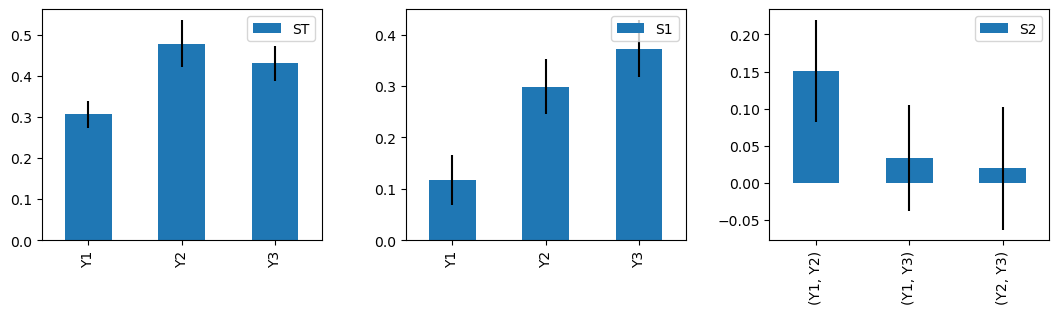

In [40]:
Si.plot()
fig = plt.gcf()
fig.set_size_inches(13, 3)
#fig.suptitle('Sensitivity Plots')
fig.subplots_adjust(wspace=0.3, hspace=0.4)
fig.tight_layout(rect=[0, 0.05, 1, 0.095])


# Partial Dependence plots

In [18]:
df = pd.read_excel("C:/Users/stane/Desktop/Folder/Projects/Thesis/Thesis/Python/data_fn.xlsx", sheet_name="surfactant")

X_data = df[['Tween 80 (% wt/wt)', 'Tween 20 (% wt/wt)', 'Triton X-100 (% wt/wt)']]
y_data = df['Activity (U/gds)']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

model = MLPRegressor(hidden_layer_sizes=(10, 400, 400, 400, 400), activation='relu', alpha=0.00000001, solver='adam', random_state=42)
model.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=1e-08, hidden_layer_sizes=(10, 400, 400, 400, 400),
             random_state=42)

C:\Users\stane\AppData\Local\Temp\ipykernel_9736\1947187231.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout(rect=[0, 0.05, 1, 0.095])


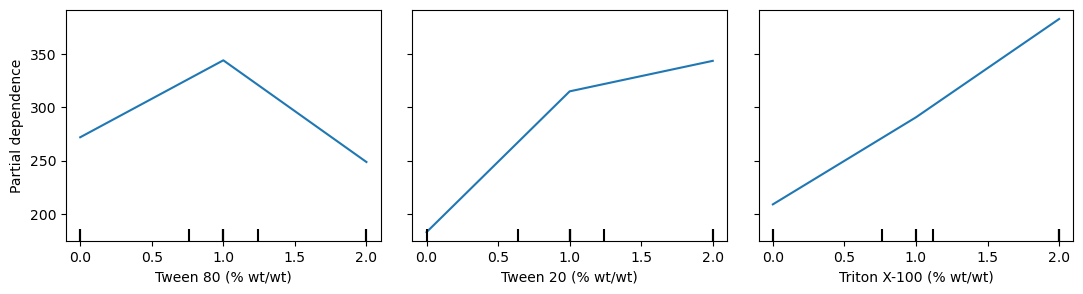

In [25]:
features_oneway = ['Tween 80 (% wt/wt)', 'Tween 20 (% wt/wt)', 'Triton X-100 (% wt/wt)']
PartialDependenceDisplay.from_estimator(model, X_train, features_oneway, grid_resolution=20)
#partial_dependence(model, X_train, features, grid_resolution=20)
fig = plt.gcf()
fig.set_size_inches(13, 3)
#fig.suptitle('One-way PDP')
fig.subplots_adjust(wspace=0.1, hspace=0.4)
fig.tight_layout(rect=[0, 0.05, 1, 0.095])


C:\Users\stane\AppData\Local\Temp\ipykernel_9736\3117594038.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout(rect=[0, 0.05, 1, 0.095])


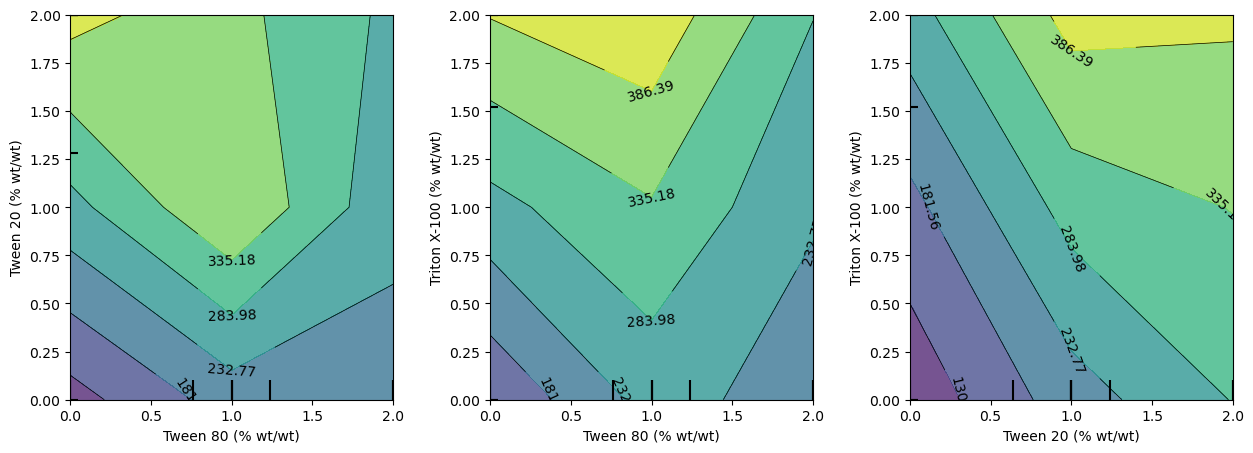

In [29]:
features_twoway = [('Tween 80 (% wt/wt)', 'Tween 20 (% wt/wt)'), ('Tween 80 (% wt/wt)', 'Triton X-100 (% wt/wt)'), ('Tween 20 (% wt/wt)', 'Triton X-100 (% wt/wt)')]  
PartialDependenceDisplay.from_estimator(model, X_train, features_twoway, grid_resolution=20)
#partial_dependence(model, X_train, features, grid_resolution=20)
fig = plt.gcf()
fig.set_size_inches(15, 5)
#fig.suptitle('Two-way PDP')
fig.subplots_adjust(wspace=0.3, hspace=0.4)
fig.tight_layout(rect=[0, 0.05, 1, 0.095])
